In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os, subprocess

from coolpuppy import coolpup
from coolpuppy.lib import numutils
from coolpuppy.lib.puputils import divide_pups
from coolpuppy import plotpup
import cooler
import bioframe
import cooltools
from cooltools import expected_cis, expected_trans
from cooltools.lib import plotting

In [2]:
resolution = 200
flank = 10000
mindist = 5000

In [3]:
# clr_1 = cooler.Cooler(f'/mnt/disk5/1/DNaseC/total/R3D7/regular_file/DMSO4h/DNaseC_R3D7_DMSO4h_UMI_rmdup.mcool::/resolutions/{resolution}')
# clr_2 = cooler.Cooler(f'/mnt/disk5/1/DNaseC/total/R3D7/regular_file/dTAG4h/DNaseC_R3D7_dTAG4h_UMI_rmdup.mcool::/resolutions/{resolution}')
# clr_3 = cooler.Cooler(f'/mnt/disk5/1/DNaseC/total/C2D5/regular_file/DMSO4h/DNaseC_C2D5_DMSO4h_UMI_rmdup.mcool::/resolutions/{resolution}')
# clr_4 = cooler.Cooler(f'/mnt/disk5/1/DNaseC/total/C2D5/regular_file/dTAG4h/DNaseC_C2D5_dTAG4h_UMI_rmdup.mcool::/resolutions/{resolution}')
# clr_5 = cooler.Cooler(f'/mnt/disk5/1/DNaseC/total/RC1A3/regular_file/DMSO4h/DNaseC_RC1A3_DMSO4h_UMI_rmdup.mcool::/resolutions/{resolution}')
# clr_6 = cooler.Cooler(f'/mnt/disk5/1/DNaseC/total/RC1A3/regular_file/dTAG4h/DNaseC_RC1A3_dTAG4h_UMI_rmdup.mcool::/resolutions/{resolution}')

# clr_0 = cooler.Cooler(f'../DNaseC_293T_total_UMI_wlink_nochrCLMT.mcool::/resolutions/{resolution}')
# clr_1 = cooler.Cooler(f'../DNaseC_R3D7_DMSO4h_UMI_rmdup.mcool::/resolutions/{resolution}')
# clr_2 = cooler.Cooler(f'../DNaseC_R3D7_dTAG4h_UMI_rmdup.mcool::/resolutions/{resolution}')
# clr_3 = cooler.Cooler(f'../DNaseC_C2D5_DMSO4h_UMI_rmdup.mcool::/resolutions/{resolution}')
# clr_4 = cooler.Cooler(f'../DNaseC_C2D5_dTAG4h_UMI_rmdup.mcool::/resolutions/{resolution}')
# clr_5 = cooler.Cooler(f'../DNaseC_RC1A3_DMSO4h_UMI_rmdup.mcool::/resolutions/{resolution}')
# clr_6 = cooler.Cooler(f'../DNaseC_RC1A3_dTAG4h_UMI_rmdup.mcool::/resolutions/{resolution}')


clr_1 = cooler.Cooler(f'DNaseC_R3D7_DMSO4h_UMI_rmdup.mcool::/resolutions/{resolution}')
clr_2 = cooler.Cooler(f'DNaseC_R3D7_dTAG4h_UMI_rmdup.mcool::/resolutions/{resolution}')
# clr_3 = cooler.Cooler(f'/mnt/disk5/1/DNaseC/total/C2D5/regular_file/DMSO4h/DNaseC_C2D5_DMSO4h_UMI_rmdup.mcool::/resolutions/{resolution}')
# clr_4 = cooler.Cooler(f'/mnt/disk5/1/DNaseC/total/C2D5/regular_file/dTAG4h/DNaseC_C2D5_dTAG4h_UMI_rmdup.mcool::/resolutions/{resolution}')
clr_5 = cooler.Cooler(f'DNaseC_RC1A3_DMSO4h_UMI_rmdup.mcool::/resolutions/{resolution}')
clr_6 = cooler.Cooler(f'DNaseC_RC1A3_dTAG4h_UMI_rmdup.mcool::/resolutions/{resolution}')

In [4]:
hg38_chromsizes = bioframe.fetch_chromsizes('hg38')
hg38_cens = bioframe.fetch_centromeres('hg38')
hg38_arms = bioframe.make_chromarms(hg38_chromsizes, hg38_cens)

hg38_arms = hg38_arms.set_index("chrom").loc[clr_1.chromnames].reset_index()

hg38_arms = bioframe.make_viewframe(hg38_arms)

In [5]:
# sites = bioframe.read_table('DNaseC_293T_loop_groupby_0.1_10kb.txt', schema='bedpe')
sites = bioframe.read_table('DNaseC_293T_loop_groupby_10_50kb.txt', schema='bedpe')
# sites = bioframe.read_table('DNaseC_293T_loop_groupby_50_5000kb.txt', schema='bedpe')

# sites = bioframe.read_table('/mnt/disk5/1/DNaseC/total/R3D7/regular_file/dTAG4h/DNaseC_R3D7_dTAG4h_UMI_rmdup_noheader.bedpe', schema='bedpe')

# sites = bioframe.read_table('/mnt/disk5/1/DNaseC/total/R3D7/regular_file/DMSO4h/DNaseC_R3D7_DMSO4h_UMI_rmdup_noheader.bedpe', schema='bedpe')

#sites = ctcf.sort_values('score', ascending=False).head(1000)

sites = sites[sites['score'] > 2]

In [6]:
sites

,chrom1,start1,end1,chrom2,start2,end2,name,score,strand1,strand2
6,chr17,73956780,73956781,chr17,73998802,73998803,125,4,-,-
15,chr17,74368445,74368446,chr17,74379590,74379591,228,12,+,+
20,chr17,74408458,74408459,chr17,74457734,74457735,272,6,+,-
23,chr17,74437852,74437853,chr17,74457734,74457735,279,24,+,-
27,chr17,74457734,74457735,chr17,74493527,74493528,301,14,-,-
...,...,...,...,...,...,...,...,...,...,...
35379,chr17,69235651,69235652,chr17,69246980,69246981,291085,3,-,-
35385,chr17,69526175,69526176,chr17,69569210,69569211,291141,8,+,+
35387,chr17,69569210,69569211,chr17,69607330,69607331,291162,7,+,+
35388,chr17,69569210,69569211,chr17,69609715,69609716,291163,3,+,+


In [7]:
# expected_0 = expected_cis(
#     clr_0,
#     ignore_diags=2,
#     view_df=hg38_arms,
#     chunksize=1000000, 
#     nproc=80
# )

In [8]:
# pup_0 = coolpup.pileup(
#     clr_0, 
#     sites, 
#     features_format='bedpe', 
#     view_df=hg38_arms, 
# #     local=True,
# #     flip_negative_strand=True, 
#     expected_df=expected_0,
# #     nshifts=10,
#     flank=flank, 
#     mindist=mindist, 
# #     maxdist=600_000,
# #     subset=2000, 
# #     seed=1,
#     min_diag=2, 
#     nproc=80
# )

In [9]:
# fig_0 = plotpup.plot(
#     pup_0,
#     score=True, 
#     cmap='coolwarm', 
#     scale='log',
#     sym=True, 
#     vmax=7.5,
#     vmin=0.13,
#     height=2, 
#     plot_ticks=True
# )

# # fig_0.savefig('293T_WT.pdf')

In [10]:
# expected_1 = expected_cis(
#     clr_1,
#     ignore_diags=2,
#     view_df=hg38_arms,
#     chunksize=1000000,
#     nproc=80,
# #     clr_weight_name=None,
# #     smooth=False
# )

In [11]:
pup_1 = coolpup.pileup(
    clr_1,
    sites,
    features_format='bedpe',
    view_df=hg38_arms,
#     local=True,
#     flip_negative_strand=True,
#     expected_df=expected_1,
#     expected_value_col='count.avg',
    nshifts=10,
    flank=flank,
    mindist=mindist,
#     maxdist=600_000,
#     subset=2000, 
#     seed=1,
    min_diag=2, 
    nproc=80,
    clr_weight_name=False,
#     coverage_norm=True
)

INFO:coolpuppy:('chr18_p', 'chr18_p'): 14
INFO:coolpuppy:('chr17_p', 'chr17_p'): 112
INFO:coolpuppy:('chr19_p', 'chr19_p'): 143
INFO:coolpuppy:('chr20_p', 'chr20_p'): 55
INFO:coolpuppy:('chr21_q', 'chr21_q'): 55
INFO:coolpuppy:('chr16_p', 'chr16_p'): 96
INFO:coolpuppy:('chr12_p', 'chr12_p'): 91
INFO:coolpuppy:('chr20_q', 'chr20_q'): 128
INFO:coolpuppy:('chr22_q', 'chr22_q'): 161
INFO:coolpuppy:('chr10_p', 'chr10_p'): 68
INFO:coolpuppy:('chr8_p', 'chr8_p'): 66
INFO:coolpuppy:('chr9_p', 'chr9_p'): 84
INFO:coolpuppy:('chr5_p', 'chr5_p'): 42
INFO:coolpuppy:('chr19_q', 'chr19_q'): 233
INFO:coolpuppy:('chr4_p', 'chr4_p'): 52
INFO:coolpuppy:('chr11_p', 'chr11_p'): 137
INFO:coolpuppy:('chr16_q', 'chr16_q'): 123
INFO:coolpuppy:('chr7_p', 'chr7_p'): 116
INFO:coolpuppy:('chr18_q', 'chr18_q'): 82
INFO:coolpuppy:('chrX_p', 'chrX_p'): 76
INFO:coolpuppy:('chr6_p', 'chr6_p'): 196
INFO:coolpuppy:('chr17_q', 'chr17_q'): 286
INFO:coolpuppy:('chr9_q', 'chr9_q'): 175
INFO:coolpuppy:('chr11_q', 'chr11_q'): 

INFO:coolpuppy:Can't set both vmin and vmax and get symmetrical scale. Plotting non-symmetrical


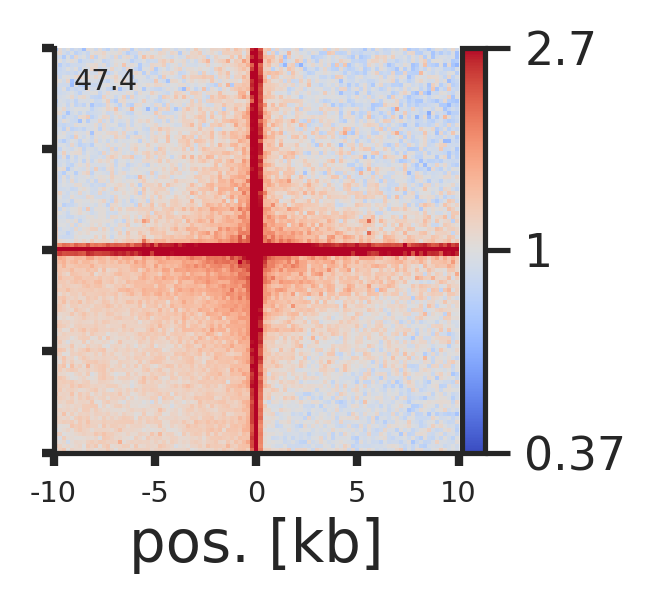

In [12]:
fig_1 = plotpup.plot(
    pup_1,
    score=True, 
    cmap='coolwarm', 
    scale='log',
    sym=True, 
    vmax=2.7,
    vmin=0.37,
    height=2, 
    plot_ticks=True
)

# fig_1.savefig('R3D7_DMSO.pdf')

In [13]:
# expected_2 = expected_cis(
#     clr_2,
#     ignore_diags=2,
#     view_df=hg38_arms,
#     chunksize=1000000, 
#     nproc=80
# )

In [14]:
pup_2 = coolpup.pileup(
    clr_2,                       
    sites,                       
    features_format='bedpe',                       
    view_df=hg38_arms,                      
#     local=True,                      
#     flip_negative_strand=True,                      
#     expected_df=expected_2,
#     expected_value_col='count.avg',
    nshifts=10,                      
    flank=flank,                      
    mindist=mindist,
#     maxdist=600_000,                     
#     subset=2000,                     
#     seed=1,                      
    min_diag=2,                     
    nproc=80,
    clr_weight_name=False,
#     coverage_norm=True
)

INFO:coolpuppy:('chr18_p', 'chr18_p'): 14
INFO:coolpuppy:('chr17_p', 'chr17_p'): 112
INFO:coolpuppy:('chr19_p', 'chr19_p'): 143
INFO:coolpuppy:('chr20_p', 'chr20_p'): 55
INFO:coolpuppy:('chr16_p', 'chr16_p'): 96
INFO:coolpuppy:('chr21_q', 'chr21_q'): 55
INFO:coolpuppy:('chr12_p', 'chr12_p'): 91
INFO:coolpuppy:('chr19_q', 'chr19_q'): 233
INFO:coolpuppy:('chr22_q', 'chr22_q'): 161
INFO:coolpuppy:('chr20_q', 'chr20_q'): 128
INFO:coolpuppy:('chr10_p', 'chr10_p'): 68
INFO:coolpuppy:('chr9_p', 'chr9_p'): 84
INFO:coolpuppy:('chr8_p', 'chr8_p'): 66
INFO:coolpuppy:('chr4_p', 'chr4_p'): 52
INFO:coolpuppy:('chr16_q', 'chr16_q'): 123
INFO:coolpuppy:('chr18_q', 'chr18_q'): 82
INFO:coolpuppy:('chrX_p', 'chrX_p'): 76
INFO:coolpuppy:('chr11_p', 'chr11_p'): 137
INFO:coolpuppy:('chr5_p', 'chr5_p'): 42
INFO:coolpuppy:('chr7_p', 'chr7_p'): 116
INFO:coolpuppy:('chr17_q', 'chr17_q'): 286
INFO:coolpuppy:('chr6_p', 'chr6_p'): 196
INFO:coolpuppy:('chr9_q', 'chr9_q'): 175
INFO:coolpuppy:('chr2_p', 'chr2_p'): 19

INFO:coolpuppy:Can't set both vmin and vmax and get symmetrical scale. Plotting non-symmetrical


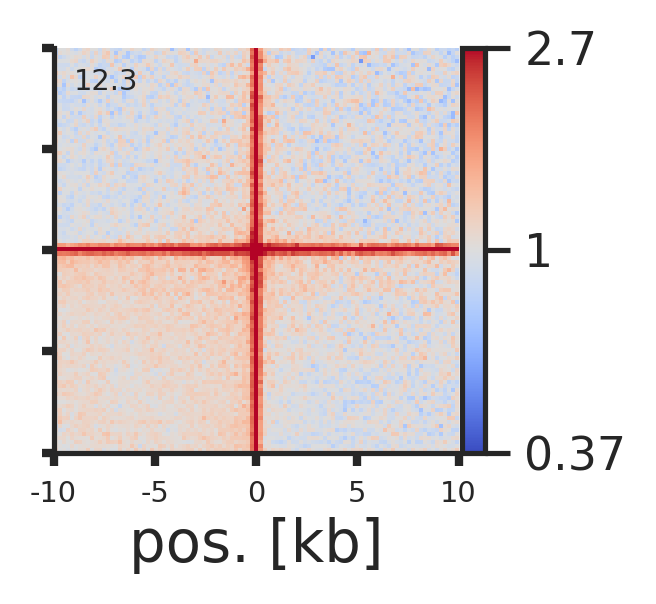

In [15]:
fig_2 = plotpup.plot(
    pup_2,             
    score=True,             
    cmap='coolwarm',             
    scale='log',             
    sym=True,
    vmax=2.7,
    vmin=0.37,        
    height=2,             
    plot_ticks=True
)

# fig_2.savefig('R3D7_dTAG.pdf')

INFO:coolpuppy:Can't set both vmin and vmax and get symmetrical scale. Plotting non-symmetrical


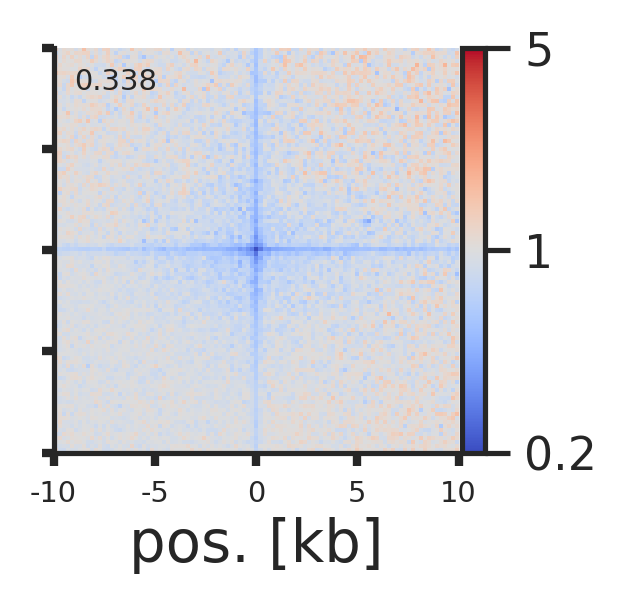

In [16]:
pup_divide_1 = divide_pups(pup_2, pup_1)

fig_divide_1 = plotpup.plot(
    pup_divide_1,             
    score=True,             
    cmap='coolwarm',             
    scale='log',             
    sym=True,             
    vmax=5,
    vmin=0.2,
    height=2,             
    plot_ticks=True
)

fig_divide_1.savefig('R3D7_dTAG-DMSO_10_50kb.pdf')

In [17]:
# expected_3= expected_cis(
#     clr_3,
#     ignore_diags=2,
#     view_df=hg38_arms,
#     chunksize=1000000, 
#     nproc=80
# )

In [18]:
# pup_3 = coolpup.pileup(
#     clr_3,                       
#     sites,                       
#     features_format='bedpe',                       
#     view_df=hg38_arms,                      
# #     local=True,                      
# #     flip_negative_strand=True,                      
#     expected_df=expected_3,                      
# #     nshifts=10,                      
#     flank=flank,                      
#     mindist=mindist, 
# #     maxdist=600_000,
# #     subset=2000, 
# #     seed=1,                      
#     min_diag=2,                      
#     nproc=80
# )

In [19]:
# fig_3 = plotpup.plot(
#     pup_3,            
#     score=True,             
#     cmap='coolwarm',             
#     scale='log',             
#     sym=True, 
#     vmax=6.3,
#     vmin=0.159,          
#     height=2,             
#     plot_ticks=True
# )

# # fig_3.savefig('C2D5_DMSO.pdf')

In [20]:
# expected_4 = expected_cis(
#     clr_4,
#     ignore_diags=2,
#     view_df=hg38_arms,
#     chunksize=1000000, 
#     nproc=80
# )

In [21]:
# pup_4 = coolpup.pileup(
#     clr_4,                       
#     sites,                       
#     features_format='bedpe',                       
#     view_df=hg38_arms,                      
# #     local=True,                      
# #     flip_negative_strand=True,                      
#     expected_df=expected_4,                      
# #     nshifts=10,                      
#     flank=flank,                      
#     mindist=mindist,                      
# #     maxdist=600_000,                     
# #     subset=2000,                     
# #     seed=1,                      
#     min_diag=2,                      
#     nproc=80
# )

In [22]:
# fig_4 = plotpup.plot(
#     pup_4,             
#     score=True,             
#     cmap='coolwarm',             
#     scale='log',             
#     sym=True, 
#     vmax=6.3,
#     vmin=0.159,          
#     height=2,             
#     plot_ticks=True
# )

# # fig_4.savefig('C2D5_dTAG.pdf')

In [23]:
# pup_divide_2 = divide_pups(pup_4, pup_3)

# fig_divide_2 = plotpup.plot(
#     pup_divide_2,             
#     score=True,             
#     cmap='coolwarm',             
#     scale='log',             
#     sym=True,             
#     vmax=3.3,             
#     vmin=0.3,        
#     height=2,             
#     plot_ticks=True            
# )

# # fig_divide_2.savefig('C2D5_dTAG-DMSO.pdf')

In [24]:
# expected_5 = expected_cis(
#     clr_5,
#     ignore_diags=2,
#     view_df=hg38_arms,
#     chunksize=1000000, 
#     nproc=80
# )

In [25]:
pup_5 = coolpup.pileup(
    clr_5,                       
    sites,                       
    features_format='bedpe',                       
    view_df=hg38_arms,                      
#     local=True,                      
#     flip_negative_strand=True,                      
#     expected_df=expected_5,
#     expected_value_col='count.avg',
    nshifts=10,                      
    flank=flank,                      
    mindist=mindist,                       
#     maxdist=600_000,                     
#     subset=2000,                     
#     seed=1,                     
    min_diag=2,                      
    nproc=80,
    clr_weight_name=False,
#     coverage_norm=True
)

INFO:coolpuppy:('chr18_p', 'chr18_p'): 14
INFO:coolpuppy:('chr17_p', 'chr17_p'): 112
INFO:coolpuppy:('chr20_p', 'chr20_p'): 55
INFO:coolpuppy:('chr19_p', 'chr19_p'): 143
INFO:coolpuppy:('chr16_p', 'chr16_p'): 96
INFO:coolpuppy:('chr12_p', 'chr12_p'): 91
INFO:coolpuppy:('chr19_q', 'chr19_q'): 233
INFO:coolpuppy:('chr21_q', 'chr21_q'): 55
INFO:coolpuppy:('chr8_p', 'chr8_p'): 66
INFO:coolpuppy:('chr20_q', 'chr20_q'): 128
INFO:coolpuppy:('chr10_p', 'chr10_p'): 68
INFO:coolpuppy:('chr22_q', 'chr22_q'): 161
INFO:coolpuppy:('chr5_p', 'chr5_p'): 42
INFO:coolpuppy:('chr4_p', 'chr4_p'): 52
INFO:coolpuppy:('chr11_p', 'chr11_p'): 137
INFO:coolpuppy:('chr9_p', 'chr9_p'): 84
INFO:coolpuppy:('chr16_q', 'chr16_q'): 123
INFO:coolpuppy:('chrX_p', 'chrX_p'): 76
INFO:coolpuppy:('chr18_q', 'chr18_q'): 82
INFO:coolpuppy:('chr7_p', 'chr7_p'): 116
INFO:coolpuppy:('chr17_q', 'chr17_q'): 286
INFO:coolpuppy:('chr6_p', 'chr6_p'): 196
INFO:coolpuppy:('chr11_q', 'chr11_q'): 319
INFO:coolpuppy:('chr15_q', 'chr15_q')

INFO:coolpuppy:Can't set both vmin and vmax and get symmetrical scale. Plotting non-symmetrical


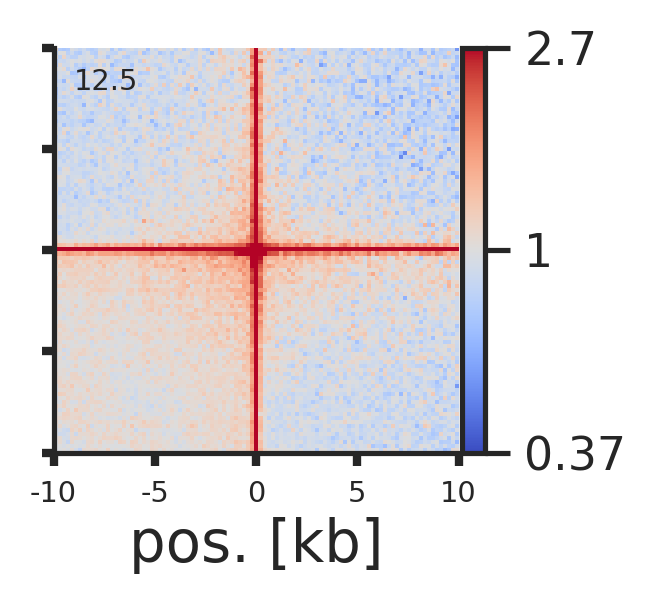

In [26]:
fig_5 = plotpup.plot(
    pup_5,             
    score=True,             
    cmap='coolwarm',             
    scale='log',             
    sym=True,             
    vmax=2.7,
    vmin=0.37,         
    height=2,             
    plot_ticks=True
)

# fig_5.savefig('RC1A3_DMSO.pdf')

In [27]:
# expected_6 = expected_cis(
#     clr_6,
#     ignore_diags=2,
#     view_df=hg38_arms,
#     chunksize=1000000, 
#     nproc=80
# )

In [28]:
pup_6 = coolpup.pileup(
    clr_6,                       
    sites,                       
    features_format='bedpe',                       
    view_df=hg38_arms,                      
#     local=True,                      
#     flip_negative_strand=True,                      
#     expected_df=expected_6, 
#     expected_value_col='count.avg',
    nshifts=10,                      
    flank=flank,                      
    mindist=mindist,                      
#     maxdist=600_000,                     
#     subset=2000,                     
#     seed=1,                      
    min_diag=2,                      
    nproc=80,
    clr_weight_name=False,
#     coverage_norm=True
)

INFO:coolpuppy:('chr18_p', 'chr18_p'): 14
INFO:coolpuppy:('chr17_p', 'chr17_p'): 112
INFO:coolpuppy:('chr20_p', 'chr20_p'): 55
INFO:coolpuppy:('chr19_p', 'chr19_p'): 143
INFO:coolpuppy:('chr12_p', 'chr12_p'): 91
INFO:coolpuppy:('chr16_p', 'chr16_p'): 96
INFO:coolpuppy:('chr21_q', 'chr21_q'): 55
INFO:coolpuppy:('chr19_q', 'chr19_q'): 233
INFO:coolpuppy:('chr22_q', 'chr22_q'): 161
INFO:coolpuppy:('chr20_q', 'chr20_q'): 128
INFO:coolpuppy:('chr8_p', 'chr8_p'): 66
INFO:coolpuppy:('chr10_p', 'chr10_p'): 68
INFO:coolpuppy:('chr5_p', 'chr5_p'): 42
INFO:coolpuppy:('chr16_q', 'chr16_q'): 123
INFO:coolpuppy:('chr4_p', 'chr4_p'): 52
INFO:coolpuppy:('chr9_p', 'chr9_p'): 84
INFO:coolpuppy:('chr11_p', 'chr11_p'): 137
INFO:coolpuppy:('chr18_q', 'chr18_q'): 82
INFO:coolpuppy:('chrX_p', 'chrX_p'): 76
INFO:coolpuppy:('chr7_p', 'chr7_p'): 116
INFO:coolpuppy:('chr6_p', 'chr6_p'): 196
INFO:coolpuppy:('chr17_q', 'chr17_q'): 286
INFO:coolpuppy:('chr2_p', 'chr2_p'): 191
INFO:coolpuppy:('chr9_q', 'chr9_q'): 17

INFO:coolpuppy:Can't set both vmin and vmax and get symmetrical scale. Plotting non-symmetrical


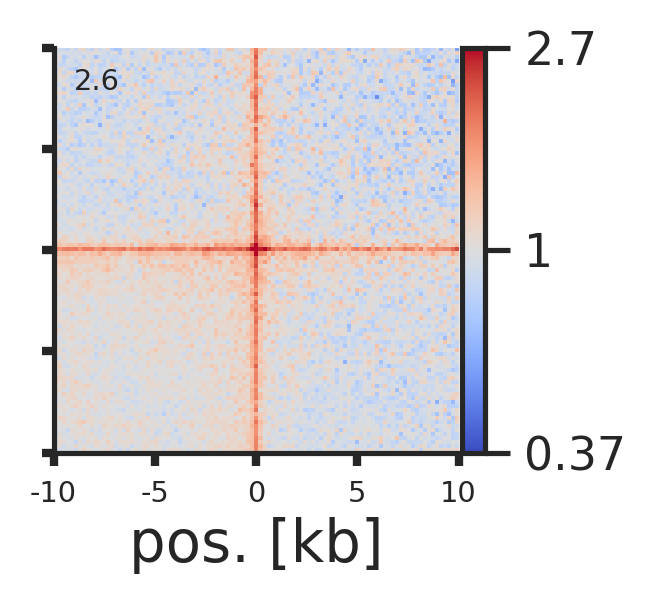

In [29]:
fig_6 = plotpup.plot(
    pup_6,             
    score=True,             
    cmap='coolwarm',             
    scale='log',             
    sym=True,              
    vmax=2.7,
    vmin=0.37,          
    height=2,             
    plot_ticks=True
)

# fig_6.savefig('RC1A3_dTAG.pdf')

INFO:coolpuppy:Can't set both vmin and vmax and get symmetrical scale. Plotting non-symmetrical


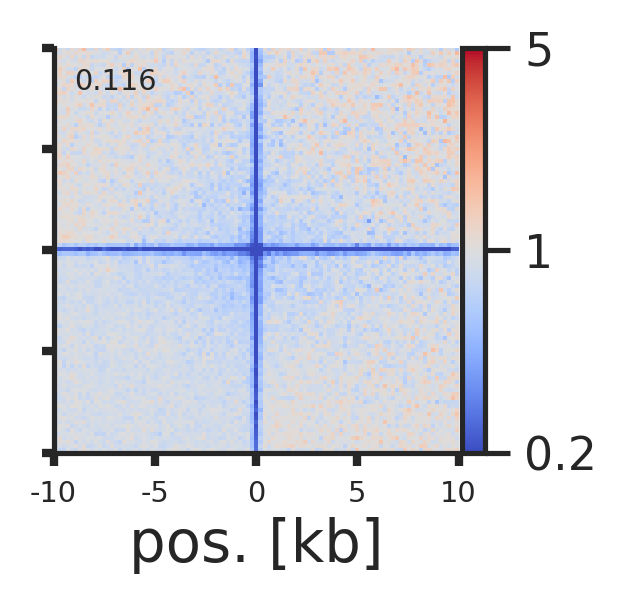

In [30]:
pup_divide_3 = divide_pups(pup_6, pup_1)

fig_divide_3 = plotpup.plot(
    pup_divide_3,
    score=True,
    cmap='coolwarm',
    scale='log',
    sym=True,
    vmax=5,
    vmin=0.2,
    height=2,
    plot_ticks=True
)

fig_divide_3.savefig('RC1A3_dTAG-DMSO_10_50kb.pdf')